# Quadratic Spline Interpolation

Hitunglah kecepatan  benda pada $t=16$ berdasarkan data yang tertera di dalam catatan perkuliahan: interpolation dengan menggunakan metode Quadratic spline interpolation.

Sebelum kita mengerjakan soal tersebut, kita bisa menyiapkan dependency dan data yang ingin kita kerjakan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
t = np.array([0, 10, 15, 20, 22.5, 30])
v_t = np.array([0, 227.04, 362.78, 517.35, 602.91, 901.67])

jumlah_spline = len(t) - 1
jumlah_titik = jumlah_spline + 1
total_variabel = jumlah_spline * 3


## Substitusi Nilai ke Setiap Spline

Pertama, kita bisa mencari sebanyak $2n$ persamaan dengan cara melakukan substitusi 2 titik ke setiap spline dengan rumus berikut.

\begin{align*}
Sn &: a_n x^2_{n-1} + b_n x_{n-1} + C_n = y_{n-1}\\
&: a_n x^2_n + b_nx_n + C_n = y_n
\end{align*}

Berdasarkan rumus tersebut, kita bisa substitusikan setiap titik-titik pada data untuk mendapatkan spline pertama hingga spline kelima, sehingga didapatkan persamaan sebagai berikut

\begin{align}
S_1 &: 0a_1 + 0b_1 + 1c_1 = 0\\
&: 100a_1 + 10b_1 + 1c_1 = 227,04\\
S_2 &: 100a_2 + 10b_2 + 1c_2 = 227,04\\
&: 225a_2 + 15b_2 + 1c_2 = 362,78\\
S_3 &: 225a_3 + 15b_3 + 1c_3 = 362,78\\
&: 400a_3 + 20b_3 + 1c_3 = 517.35\\
S_4 &: 400a_4 + 20b_4 + 1c_4 = 517.35\\
&: 506,25a_4 + 22,5b_4 + 1c_4 = 602,91\\
S_5 &: 506,25a_5 + 22,5b_5 + 1c_5 = 602,91\\
&: 900a_5 + 30b_5 + 1c_5 = 901.67
\end{align}

Persamaan yang kita miliki saat ini hanya berjumlah $2n$, yaitu $10$ persamaan, sementara itu, kita memerlukan $15$ persamaan untuk mencari $15$ variabel.

## Turunan dari $S_i$ dan $S_{i+1}$ pada Titik $x_i, y_i$ adalah Sama

Kita bisa mencari persamaan lainnya sehingga kita memiliki 15 persamaan dengan cara mencari turunan dari dua spline terhadap sebuah titik. Dari sini, kita bisa mendapatkan persamaan sebanyak $n-1$, yaitu $4$ persamaan, dengan rumus berikut ini.

\begin{align*}
S_{n-1} \& S_n &: 2a_nX_{n-1} + b_n - 2a_nX_{n-1} - b_n = 0
\end{align*}

Kita bisa langsung melakukan substitusi nilai $x$ pada persamaan tersebut, sehingga didapatkan hasil sebagai berikut ini.

\begin{align}
S_{1} \& S_2 &: 20a_1 + 1b_1 - 20a_2 - 1b_2 = 0\\
S_{2} \& S_3 &: 30a_2 + 1b_2 - 30a_3 - 1b_3 = 0\\
S_{3} \& S_4 &: 40a_3 + 1b_3 - 40a_4 - 1b_4 = 0\\
S_{4} \& S_5 &: 45a_4 + 1b_4 - 45a_5 - 1b_5 = 0\\
\end{align}

Dari persamaan tersebut, kita sudah memiliki sebanyak $14$ persamaan. Namun, persamaan yang kita butuhkan berjumlah $15$, sehingga kita perlu mencari $1$ persamaan lagi untuk bisa mencari nilai dari masing-masing variabel.

## Asumsi Turunan ke-2 Sama dengan 0

\begin{align*}
\frac{d^2}{dx}(a_1x^2 + b_1x + C_1) = 0\\
2a_1 = 0
\end{align*}

Untuk mencari persamaan terakhir, kita bisa membuat asumsi bahwa turunan kedua dari persamaan pertama sama dengan nol. Dengan demikian kita sudah memiliki $15$ persamaan dan bisa mencari nilai dari $15$ variabel yang tidak kita ketahui.

## Mencari Solusi dengan Matriks

Setelah mendapatkan 15 persamaan, kita bisa membuat dalam bentuk matriks, sehingga kita bisa dengan mudah mencari solusinya dengan menggunakan inverse matriks yang akan dibantu oleh program python.

\begin{align*}
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
100 & 10 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 100 & 10 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 225 & 15 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 225 & 15 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 400 & 20 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 400 & 20 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 506.25 & 22.5 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 506.25 & 22.5 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 900 & 30 & 1 & 0 \\
20 & 1 & 0 & -20 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 30 & 1 & 0 & -30 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 40 & 1 & 0 & -40 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 45 & 1 & 0 & -45 & -1 & 0 \\
2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
a_1\\
b_1\\
c_1\\
a_2\\
b_2\\
c_2\\
a_3\\
b_3\\
c_3\\
a_4\\
b_4\\
c_4\\
a_5\\
b_5\\
c_5
\end{bmatrix} &=
\begin{bmatrix}
0 \\
227.04 \\
227.04 \\
362.78 \\
362.78 \\
517.35 \\
517.35 \\
602.91 \\
602.91 \\
901.67 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
\end{align*}

Matriks tersebut tentunya akan rumit untuk diselesaikan secara manual. Akan lebih baik apabila kita menyelesaikannya menggunakan metode inverse yang bisa dengan mudah diselesaikan di python

In [3]:
A = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [100, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 100, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 225, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 225, 15, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 400, 20, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 400, 20, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 506.25, 22.5, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 506.25, 22.5, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 900, 30, 1],
    [20, 1, 0, -20, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 30, 1, 0, -30, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 40, 1, 0, -40, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 1, 0, -45, -1, 0],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

b = np.array([0, 227.04, 227.04, 362.78, 362.78, 517.35, 517.35, 602.91, 602.91, 901.67, 0, 0, 0, 0, 0])


In [4]:
def matrix_inverse(A, b):
    # Menghitung solusi dengan mengalikan invers matriks A dengan vektor b
    A_inv = np.linalg.inv(A)
    x = np.dot(A_inv, b)

    # Membuat DataFrame untuk tampilan yang rapi
    df_x = pd.DataFrame(x, columns=['Solution'])

    # Menampilkan solusi
    print(df_x)

In [5]:
matrix_inverse(A, b)

        Solution
0  -1.013484e-13
1   2.270400e+01
2   0.000000e+00
3   8.888000e-01
4   4.928000e+00
5   8.888000e+01
6  -1.356000e-01
7   3.566000e+01
8  -1.416100e+02
9   1.595200e+00
10 -3.357200e+01
11  5.507100e+02
12  2.163556e-01
13  2.847600e+01
14 -1.473300e+02


## Substitusi $t=16$

Dari hasil penyelesaian matriks tersebut dengan menggunakan metode inverse, kita bisa mengetahui solusi atau nilai dari masing-masing variabel yang kita cari. Selanjutnya, kita bisa mencari $v(t)$ dengan $t = 16$ pada spline yang bersesuaian.

Karena $t = 16$ berada antara titik $15$ dan $20$, yang mana merupakan area dari spline ke-3, maka kita bisa menggunakan nilai $a_3$ $(-1.356000e-01)$, $b_3$ $(3.566000e+01)$, dan $c_3$ $(-1.416100e+02)$ untuk disubstitusikan pada persamaan kuadrat.

\begin{align*}
v(16) &= at^2 + bt + c\\
&= -0.1356(16)^2 + 35.66(16) - 141.61\\
&= 394.2363999999999
\end{align*}

In [6]:
# Rumus dasar persamaan kuadrat
def quadratic_spline(t, a, b, c):
    return a * t**2 + b * t + c

In [7]:
quadratic_spline(16, -1.356000e-01, 3.566000e+01, -1.416100e+02)

394.2363999999999

Bisa dilihat pada hasil operasi program python di atas, nilai $v(16)$ yang dicari menggunakan metode quadratic spline interpolation adalah $394.2363999999999$.

Disamping itu, kita juga bisa melakukan plotting grafik interpolasi berdasarkan nilai yang sudah kita miliki sebelumnya. Kode di bawah ini pada dasarnya akan melakukan substitusi nilai $a$, $b$, dan $c$ untuk masing-masing spline dengan batas x sesuai titik yang ada pada data.

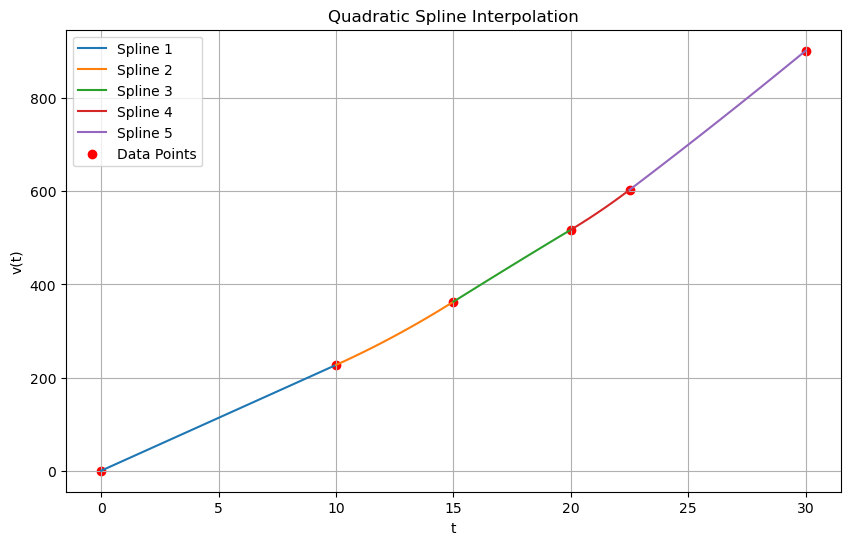

In [8]:
# Solusi dari persamaan
coefficients = np.array([
    [-1.013430e-13, 2.270400e+01, 0.000000e+00],   # [a1, b1, c1]
    [8.888000e-01, 4.928000e+00, 8.888000e+01],   # [a2, b2, c2]
    [-1.356000e-01, 3.566000e+01, -1.416100e+02],  # [a3, b3, c3]
    [1.604800e+00, -3.395600e+01, 5.545500e+02],  # [a4, b4, c4]
    [2.088889e-01, 2.886000e+01, -1.521300e+02]  # [a5, b5, c5]
])

# Interval untuk setiap spline
intervals = [
    (0, 10), 
    (10, 15), 
    (15, 20), 
    (20, 22.5), 
    (22.5, 30)
]

# Membuat figure
plt.figure(figsize=(10, 6))

# Loop untuk setiap interval dan plot spline kuadrat
for i, (a, b, c) in enumerate(coefficients):
    t_interval = np.linspace(intervals[i][0], intervals[i][1])
    v_interval = quadratic_spline(t_interval, a, b, c)
    plt.plot(t_interval, v_interval, label=f'Spline {i+1}')

# Plot data asli
plt.scatter(t, v_t, color='red', label='Data Points')

# Mengatur judul dan label sumbu
plt.title('Quadratic Spline Interpolation')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.grid(True)
plt.show()
